<a href="https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki?scriptVersionId=114688762" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

# импорт абсолютных курсов
abscur = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col=0,parse_dates=True)

# импорт сурсов закрытия акций
s_close = pd.read_csv('/kaggle/input/mmvb-blue-fishki/close_table.csv',index_col=0,parse_dates=True)

# импорт объемов акций
s_vol = pd.read_csv('/kaggle/input/mmvb-blue-fishki/vol_table.csv',index_col=0,parse_dates=True)

# вычисление абсолютных курсов для акций
s_abscur = pd.merge(left=abscur.RUB,right=s_close,left_index=True,right_index=True).apply(lambda row: row*row[0],axis=1).iloc[:,1:]
s_abscur.index.name = "Date"

# выгрузка абсолютных курсов акций
s_abscur.reset_index().to_csv('s_abscur.csv',index=False)

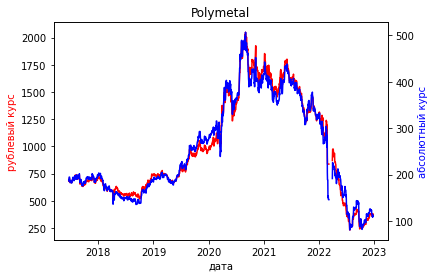

In [2]:
import matplotlib.pyplot as plt

for name in s_abscur.columns:
    fig,ax1 = plt.subplots()
    
    ax1.set_xlabel('дата') 
    ax1.set_ylabel('рублевый курс', color = 'red') 
    ax1.plot(s_close[name], color = 'red') 
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('абсолютный курс',color = 'blue')
    ax2.plot(s_abscur[name],color = 'blue')
    
    plt.title(name)
    plt.show()
    
    break